In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest


In [2]:
df = pd.read_csv("Healthcare-Diabetes.csv")
df = df.drop('Id', axis=1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   int64  
 2   BloodPressure             2768 non-null   int64  
 3   SkinThickness             2768 non-null   int64  
 4   Insulin                   2768 non-null   int64  
 5   BMI                       2768 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2768 non-null   int64  
 8   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 194.8 KB


In [4]:
df_clean = df.copy()

# Colunas onde zero significa dado ausente
cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Substituir zeros por NaN
df_clean[cols_with_missing] = df[cols_with_missing].replace(0, pd.NA)

# Converter explicitamente para float
df_clean[cols_with_missing] = df_clean[cols_with_missing].apply(pd.to_numeric, errors='coerce')

In [5]:
df_clean.isnull().sum()

Pregnancies                    0
Glucose                       18
BloodPressure                125
SkinThickness                800
Insulin                     1330
BMI                           39
DiabetesPedigreeFunction       0
Age                            0
Outcome                        0
dtype: int64

In [6]:
# Substituir NaN pela média da coluna
for col in cols_with_missing:
    df_clean[col] = df_clean[col].fillna(df[col].median())

df_clean.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Valores como 0 em "Glicose" ou "IMC" são biologicamente impossíveis, ou seja, são dados faltantes (erros). Substituímos pela mediana (e não pela média) porque a mediana é menos afetada por outliers (valores extremos), mantendo a integridade dos dados médicos.

In [7]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2768.0,3.742775,3.323801,0.000,1.000,3.000,6.000,17.00
Glucose,2768.0,121.863439,30.503499,44.000,99.000,117.000,141.000,199.00
BloodPressure,2768.0,72.385838,11.988549,24.000,64.000,72.000,80.000,122.00
SkinThickness,2768.0,27.471821,9.470778,7.000,23.000,23.000,32.000,110.00
Insulin,2768.0,97.906069,100.516123,14.000,37.000,37.000,130.000,846.00
BMI,2768.0,32.591077,7.103578,18.200,27.575,32.200,36.625,80.60
DiabetesPedigreeFunction,2768.0,0.471193,0.325669,0.078,0.244,0.375,0.624,2.42
Age,2768.0,33.132225,11.777230,21.000,24.000,29.000,40.000,81.00
Outcome,2768.0,0.343931,0.475104,0.000,0.000,0.000,1.000,1.00


In [8]:
sns.set_theme(style="whitegrid", palette="muted")

df_clean_analysis = df_clean.drop(columns='Outcome')

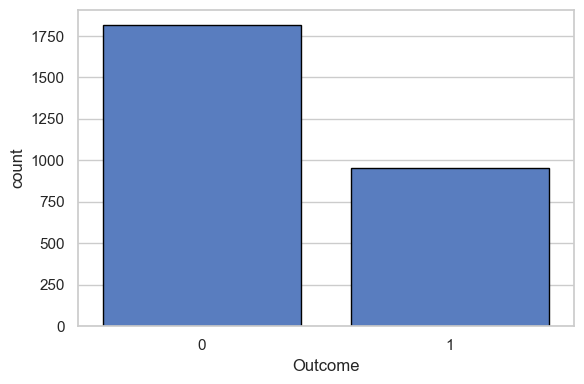

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_clean, x='Outcome', edgecolor='black')

plt.tight_layout()
plt.show()

In [10]:
df_clean.to_csv('diabetes_final.csv', index=False)